# Algorithms for DNA Sequencing Labs
## Week 1
    1.1) string basics
    1.2) manupulating DNA strings
    1.3) parsing reference genome
    1.4) working with sequencing reads
    1.5) analyzing reads by position

## 1.1 string basics

In [ ]:
seq = 'ACGT'

In [2]:
seq[1]

In [3]:
len(seq)

In [4]:
e = ''

In [5]:
len(e)

In [6]:
seq1 = 'CCAA'
seq2 = 'GGTT'
print(seq1+seq2)

In [7]:
seqs = ['A', 'C', 'G', 'T']
print(''.join(seqs))

ACGT


In [8]:
seqs = ['A', 'C', 'G', 'T']
print(','.join(seqs))

A,C,G,T


In [9]:
import random
random.choice('ACGT')

'G'

In [10]:
random.seed(7)
random.choice('ACGT')

'G'

In [11]:
seq = ''
for _ in range(10):
    seq += random.choice('ACTG')
print(seq)

CGAAATACAA


In [12]:
# we use the underscore above because we don't care what index 
# we're at in the iteration. use the _ bc we dnt want to save the number to a variable
# otherwise we'd use 'i'

In [13]:
seq = ''.join([random.choice('ACGT') for _ in range(10)])
print(seq)

TTACATAACA


In [14]:
# substrings
seq[1:3]

'TA'

In [15]:
# prefix
seq[:3]

'TTA'

In [16]:
# suffix
seq[7:]

'ACA'

In [17]:
# another way to suffix
seq[7:len(seq)]

'ACA'

In [18]:
seq[-3]

'A'

## 1.2 manupulating DNA strings

In [19]:
# write a function to find the longest common prefix between 2 strings
def longestCommonPrefix(s1, s2):
    i = 0 # index starting from zero
    # as long as the index is within the range of 
    # both strings, we'll see whether the 2 strings are identical
    # if so, we will increment the index
    # using a while loop
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1 # increment i
    # when we finish this loop, we'll be at the point
    # where either we've exhausted one or both of the
    # strings or we've reached a mismatch. 
    # now we can just return the part of either string
    # up to but not including i
    return s1[:i]
longestCommonPrefix('ACCATGT', 'ACCAGAC')

'ACCA'

In [20]:
# write func to see whether 2 strings match exactly
def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
        
    return True

match('ATGCT', 'ATGCT')

True

In [21]:
match('ATCGT', 'ATGGT')

False

In [22]:
# python already has a method that does this for us
'ACTGC' == 'ACGTG'

False

In [23]:
# reverse complement of DNA strand
# use dictionary
complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G':'C'}
# dictionary is an associative array
complement['C']

'G'

In [24]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'T': 'A', 'G':'C'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACTCACTGGT')

'ACCAGTGAGT'

## 1.3 parsing reference genome

In [25]:
# Following line downloads FASTA file containing the lambda phage reference genome
# That ! before wget allows us to use iPython to run a command line script and obtain this file 
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-12-08 13:49:00--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.192, 99.84.232.26, 99.84.232.33, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.2’

lambda_virus.fa.2   100%[===================>]  48.12K  --.-KB/s    in 0.08s   

2020-12-08 13:49:01 (587 KB/s) - ‘lambda_virus.fa.2’ saved [49270/49270]



In [26]:
# function to read the genome
def readGenome(filename):
    genome = '' # set as empty string
    with open(filename, 'r') as f: # open to read only
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip() # rstrip removes any trailing whitespace from the end of the string
    return genome
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [27]:
# read more about with statements
# https://www.geeksforgeeks.org/with-statement-in-python/

In [28]:
len(genome)

48502

In [29]:
# count the frequency of each base
# use a dictionary
# have a key for each base
# value for the number of times that base occurs (freq)
# initialize each base count to zero
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0} 
# now we'll loop through each base in the genome
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [30]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## 1.4 working with sequencing reads

In [32]:
# review: clusters provide backup for data
# Q scores help show confidence in calls
# Q = -10log(p)
# Q: base quality; p: probability that the base call is incorrect
# Q = 10 --> 1 in 10 chance call is incorrect
# Q = 20 --> 1 in 100
# Q = 30 --> 1 in 1000

In [33]:
# base qualities
# usual ASCII encoding is Phred 33

def QtoPhred33(Q):
    """Turn Q into Phred + 33 ASCII-Encoded quality"""
    return chr(Q + 33)

def phred33toQ(qual):
    """Turn Phred + 33 ASCII-Encoded quality into Q"""
    return ord(qual)-33

In [34]:
QtoPhred33(40)

'I'

In [35]:
phred33toQ('I')

40

In [36]:
# download FASTQ file
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2020-12-08 13:49:01--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.26, 99.84.232.33, 99.84.232.227, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.2’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.1s    

2020-12-08 13:49:02 (1.48 MB/s) - ‘SRR835775_1.first1000.fastq.2’ saved [224786/224786]



In [37]:
# write function to read FASTQ file and parse it
# each time you go through this loop, you read 4 lines (traditional FASTQ format)
# FASTQs have 4 lines: 1) machine/exp info 2) sequence 3) + sign 4) quality scores in ASCII format
def readFASTQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True: # this is where you parse each line of each FASTQ entry
            fh.readline().rstrip() # add rstrip to remove white space
            seq = fh.readline()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFASTQ('SRR835775_1.first1000.fastq')

In [38]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC\n', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC\n', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG\n', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA\n', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC\n']


In [39]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [40]:
# histogram of quality scores
# first need to use the function to convert ASCII to quality
def phred33toQ(qual):
    """Turn Phred + 33 ASCII-Encoded quality into Q"""
    return ord(qual)-33

In [41]:
phred33toQ('#')

2

In [42]:
phred33toQ('J')

41

In [43]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33toQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

<Figure size 640x480 with 1 Axes>

In [45]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [46]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [47]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


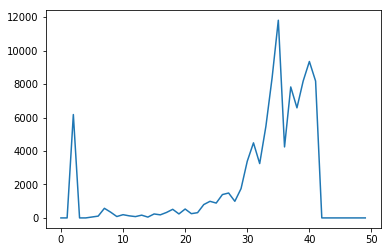

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

## 1.5 analyzing reads by position

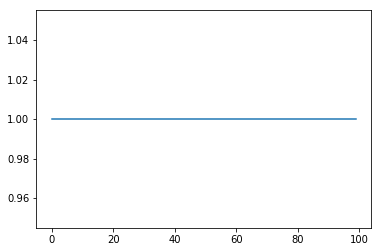

In [49]:
# use same data set and plot GC content at each position in the reads
# GC content differs from species to species
# different species will have different characteristic GC contents
def findGCbypos(reads):
    gc = [0] * 100 # list of number of GC bases we've seen at each position in the reads
                   # all reads in this data set are length 100bp
    totals = [0] * 100 # list of total number of bases we've seen at each position
                        # then we can divide out each index (gc/total)
    for read in reads:# loop through each read in our set of reads
        for i in range(len(read)):# for each index i in the length of the read
            if read[i] == 'C' or read[i] == 'G':# check if read is a C or a G
                gc[i] += 1# increment GC array at index i
                totals[i] += 1# regardless of what that base is, we want to increment the totals array in index i
    for i in range(len(gc)):
        if totals[i] > 0:# avoid divide by 0 error
            gc[i] /= float(totals[i]) # convert to float
    return gc

gc = findGCbypos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

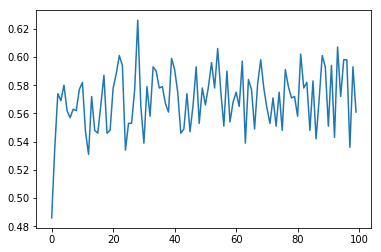

In [50]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [51]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

## 1.6 naive exact matching: matching artificial reads

In [52]:
# matching artificial reads
# naive exact matching algorithm

In [53]:
# download genome for PhiX
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2020-12-08 13:49:04--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.33, 99.84.232.227, 99.84.232.192, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.2’

phix.fa.2           100%[===================>]   5.40K  --.-KB/s    in 0s      

2020-12-08 13:49:04 (87.9 MB/s) - ‘phix.fa.2’ saved [5528/5528]



In [54]:
# use the readGenome function to read this
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('phix.fa')

In [55]:
def naive(p, t):
    occurrences = [] # keep track of all indices where p matches t
    for i in range(len(t)-len(p) + 1):# loop through every position where p could start
        # create a boolean variable match which we'll initialize to be true
        # compare every character of P against the corresponding position in t
        # if there's a mismatch, set match to false
        # for j in range up to the length of p
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [56]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [57]:
# generate reads from genome
import random
def generateReads(genome, numReads, readLen):
    '''Generate reads from random positions in the given genome'''
    
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome) - readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [58]:
reads = generateReads(genome, 100, 100)

numMatched = 0
for r in reads:
    matches = naive(r, genome) # read is pattern, genome is text
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched exactly!' % (numMatched, len(reads)))

100 / 100 reads matched exactly!


## 1.7 naive exact matching: matching real reads

In [59]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2020-12-08 13:49:05--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.227, 99.84.232.192, 99.84.232.26, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq.2’

ERR266411_1.first10 100%[===================>] 248.42K   690KB/s    in 0.4s    

2020-12-08 13:49:06 (690 KB/s) - ‘ERR266411_1.first1000.fastq.2’ saved [254384/254384]



In [60]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('ERR266411_1.first1000.fastq')

In [61]:
import collections
phix_reads = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC': 3,
         'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC': 1,
         'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG': 2,
         'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC': 13,
         'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG': 3,
         'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT': 14,
         'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAAC': 3,
         'CAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGA': 4,
         'GTAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGCAATAT

In [62]:
phix_reads, _ = readFastq('ERR266411_1.first1000.fastq')

In [63]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

7 / 1000 reads matched the genome exactly!


In [64]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [65]:
# align reverse complement too!
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [66]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!
